In [2]:
import pandas as pd
import numpy as np
from readFile import split_into_values, toRPdata
# columns 와 value는 사용자 입력
df = pd.read_csv('resources/AXISX_resample.csv')
columns = ['chip', 'wire', 'segment']
value = ['value']
#df = pd.read_csv('resources/Dataset1.csv')
#columns = ['Process', 'Step']
#value = ['Value']

df = df.loc[:, columns + value] #('chip', 'wire', 'value')는 사용자 입력
size = 28
result = split_into_values(df, columns)
result

,0,1,2,3,4,5,6,7,8,9,...,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230
0,1.873603,2.015115,2.033436,1.987634,1.932988,1.971524,2.002796,1.975631,1.870761,1.691660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.417595,3.417911,3.412541,3.379690,3.314304,3.225544,3.105196,2.983900,2.844916,2.692980,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.328519,3.335468,3.329150,3.301038,3.280822,3.235020,3.174372,3.097615,3.018646,2.927043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.184310,0.159040,0.189680,0.249064,0.339088,0.448065,0.658121,0.966098,1.277234,1.586790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.182731,0.134718,0.157145,0.259804,0.454066,0.663175,0.883339,1.119612,1.411480,1.787370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,3.328519,3.331362,3.322201,3.297879,3.246075,3.152261,3.023068,2.872713,2.711301,2.533464,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1326,0.203894,0.151775,0.163462,0.256329,0.390891,0.613267,0.849856,1.153411,1.513191,1.939305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1327,0.204842,0.149564,0.153986,0.207369,0.311923,0.477441,0.644222,0.861228,1.049173,1.251016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,0.312871,0.254118,0.295813,0.400999,0.551987,0.652119,0.694762,0.754778,0.927561,1.158781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

# 2. 시계열 셋 크기 변경
result_ = TimeSeriesResampler(sz=size).fit_transform(result)
print(result_)
print(result_.shape)

[[[1.873603  ]
  [1.98066156]
  [1.51153007]
  ...
  [1.79338319]
  [2.79209452]
  [3.405276  ]]

 [[3.417595  ]
  [2.06036707]
  [0.30373359]
  ...
  [0.16429311]
  [1.45742174]
  [3.293772  ]]

 [[3.328519  ]
  [0.38668011]
  [0.67563422]
  ...
  [2.77244033]
  [0.76972978]
  [0.295182  ]]

 ...

 [[0.204842  ]
  [2.01134741]
  [3.22680741]
  ...
  [2.60646552]
  [1.63126933]
  [0.406369  ]]

 [[0.312871  ]
  [0.57794715]
  [1.04745285]
  ...
  [0.94926278]
  [0.45226456]
  [0.382995  ]]

 [[0.302447  ]
  [0.67004219]
  [1.81942504]
  ...
  [1.29652519]
  [1.10419352]
  [0.611056  ]]]
(1330, 28, 1)


In [6]:
data = result_.reshape(result_.shape[0], 1, size)
data.shape

(1330, 1, 28)

In [7]:
X = toRPdata(data)
print(X.shape)

(1330, 28, 28)


In [8]:
X = np.expand_dims(X, axis=3)
X.shape

(1330, 28, 28, 1)

In [38]:
from sklearn.preprocessing import MinMaxScaler

def MinMax(data):
    MMS = MinMaxScaler().fit(data)
    scaled = MMS.transform(data)
    return scaled

scaled_data = MinMax(image[0])

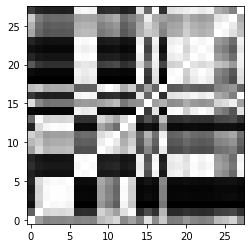

In [31]:
import matplotlib.pyplot as plt
plt.imshow(scaled_data, cmap='binary', origin='lower')

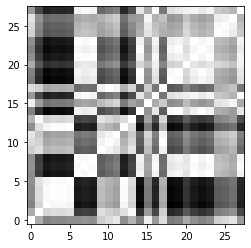

In [33]:
plt.imshow(image[0], cmap='binary', origin='lower')

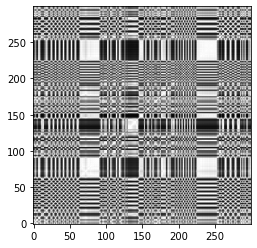

In [39]:
plt.imshow(scaled_data, cmap='binary', origin='lower')

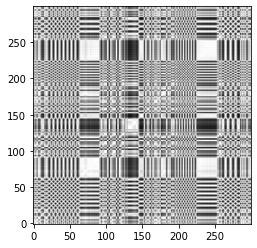

In [40]:
plt.imshow(image[0], cmap='binary', origin='lower')